In [21]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

plt.style.use('fivethirtyeight')

In [2]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv('2016-general-election-trump-vs-clinton-vs-johnson.csv',index_col=False, low_memory=False)

# Let's get a glimpse at the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 18 columns):
Pollster                  914 non-null object
Start Date                914 non-null object
End Date                  914 non-null object
Entry Date/Time (ET)      914 non-null object
Number of Observations    625 non-null float64
Population                914 non-null object
Mode                      914 non-null object
Trump                     914 non-null float64
Clinton                   914 non-null float64
Johnson                   248 non-null float64
Other                     546 non-null float64
Undecided                 868 non-null float64
Pollster URL              914 non-null object
Source URL                914 non-null object
Partisan                  914 non-null object
Affiliation               914 non-null object
Question Text             242 non-null object
Question Iteration        914 non-null int64
dtypes: float64(6), int64(1), object(11)
memory usage: 128.6+ 

In [ ]:
poll_df.head(3)

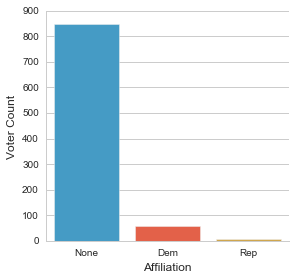

In [148]:
#Counts of affiliation
fig=sns.factorplot('Affiliation',data=poll_df,kind='count')
fig.set_axis_labels('Affiliation', 'Voter Count')

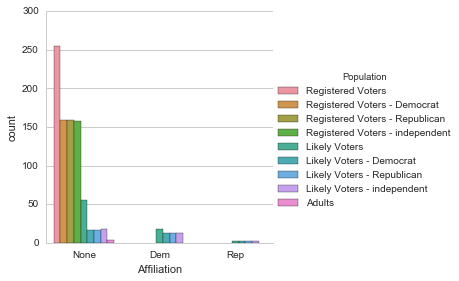

In [44]:
#Lets take a look at how voters are registered vs. their affiliation
sns.factorplot('Affiliation',data=poll_df,hue='Population',kind='count')

In [11]:
#Last day of polling data
poll_df['Start Date'].max()

'2016-08-11'

In [12]:
#First day of polling data
poll_df['Start Date'].min()

'2015-05-19'

In [46]:
from datetime import datetime

In [ ]:
poll_df['Difference']=(poll_df.Clinton - poll_df.Trump)/100

In [ ]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

poll_df.head()

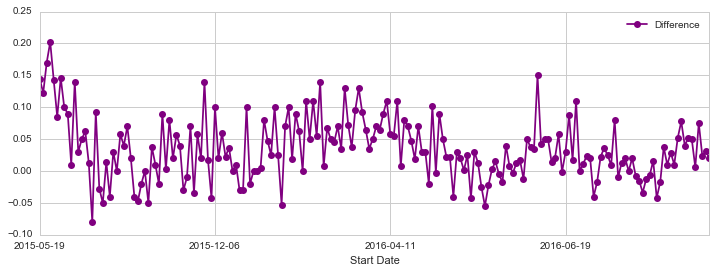

In [6]:
#Note: When the polls favor clinton we see a point plotted above 0.  If they favor trump it is plotted below 0.
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),color='purple',marker='o')

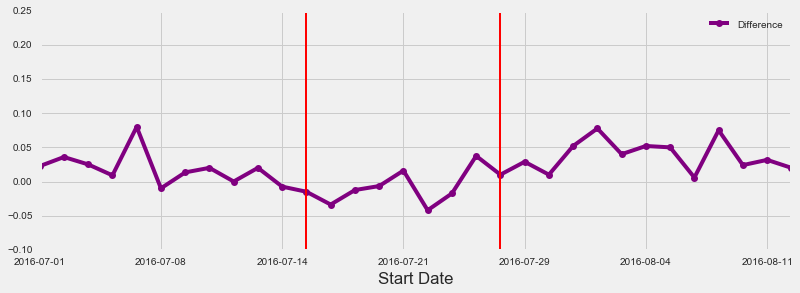

In [121]:
#Change in polls after party conventions.
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),color='purple',marker='o',xlim=(160,191))

#Democratic Convention July 28th
plt.axvline(x=179, linewidth=2,color='red')

#Republican Convention July 10th
plt.axvline(x=171,linewidth=2,color='red')

In [79]:
#Looks like the republican convention boosted Trumps short term results but the Democratic convention has put Clinton on an/
#upward boost that has yet to let up.  

In [3]:
#Pulling national donor data into a dataframe. Will be exploring total donations as well as donations by occupation.
donor_df = pd.read_csv('ALL.csv', index_col=False, low_memory=False)
donor_df.head(2)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016


In [4]:
#Taking out all the negative values (Deductions)
donor_df=donor_df[donor_df > 0]

In [63]:
#Average Donation Amount
donor_df['contb_receipt_amt'].mean()

139.86226827082606

In [64]:
#Maximum Donation Amount
donor_df['contb_receipt_amt'].max()

7402361.4500000002

In [5]:
# Assigning each candidate a respective party of affiliation ie. 'Republican, Democrat, Libertarian, Green Party'
candidate=donor_df['cand_nm'].unique()
candidate

array(['Rubio, Marco', 'Santorum, Richard J.', 'Perry, James R. (Rick)',
       'Carson, Benjamin S.', "Cruz, Rafael Edward 'Ted'", 'Paul, Rand',
       'Clinton, Hillary Rodham', 'Sanders, Bernard', 'Fiorina, Carly',
       'Huckabee, Mike', 'Pataki, George E.', "O'Malley, Martin Joseph",
       'Graham, Lindsey O.', 'Bush, Jeb', 'Trump, Donald J.',
       'Jindal, Bobby', 'Christie, Christopher J.', 'Walker, Scott',
       'Stein, Jill', 'Webb, James Henry Jr.', 'Kasich, John R.',
       'Gilmore, James S III', 'Lessig, Lawrence', 'Johnson, Gary'], dtype=object)

In [6]:
party_map={'Rubio, Marco':'Republican','Santorum, Richard J.':'Republican','Perry, James R. (Rick)': 'Republican',
           'Carson, Benjamin S.':'Republican',"Cruz, Rafael Edward 'Ted'":'Republican',
           'Paul, Rand':'Republican','Clinton, Hillary Rodham':'Democrat','Sanders, Bernard':'Democrat',
           'Fiorina, Carly':'Republican','Huckabee, Mike':'Republican','Pataki, George E.': 'Republican', 
           "O'Malley, Martin Joseph":'Republican', 'Graham, Lindsey O.':'Republican',
           'Bush, Jeb':'Republican','Trump, Donald J.':'Republican','Jindal, Bobby':'Republican',
           'Christie, Christopher J.':'Republican','Walker, Scott':'Republican',
           'Webb, James Henry Jr.':'Republican','Kasich, John R.':'Republican',
           'Gilmore, James S III':'Republican','Lessig, Lawrence':'Democrat'
          }

In [7]:
donor_df['Party']=donor_df['cand_nm'].map(party_map)

In [87]:
#Listing exact donations amounts per candidate
#Taking a look at the total amount raised.
cand_amount=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

i=0

for don in cand_amount:
    print '%s raised %s dollars' %(cand_amount.index[i],don)
    print ''
    i+=1

Bush, Jeb raised 33773733.24 dollars

Carson, Benjamin S. raised 29013999.56 dollars

Christie, Christopher J. raised 8213719.64 dollars

Clinton, Hillary Rodham raised 235752975.77 dollars

Cruz, Rafael Edward 'Ted' raised 69746067.02 dollars

Fiorina, Carly raised 6693844.66 dollars

Gilmore, James S III raised 101510.71 dollars

Graham, Lindsey O. raised 4597161.82 dollars

Huckabee, Mike raised 2498977.66 dollars

Jindal, Bobby raised 1275393.16 dollars

Johnson, Gary raised 645637.27 dollars

Kasich, John R. raised 14752578.02 dollars

Lessig, Lawrence raised 624219.5 dollars

O'Malley, Martin Joseph raised 4057451.76 dollars

Pataki, George E. raised 507349.45 dollars

Paul, Rand raised 6271873.25 dollars

Perry, James R. (Rick) raised 1189868.23 dollars

Rubio, Marco raised 40541577.67 dollars

Sanders, Bernard raised 96731743.95 dollars

Santorum, Richard J. raised 1130000.06 dollars

Stein, Jill raised 223289.0 dollars

Trump, Donald J. raised 14828838.91 dollars

Walker, Scot

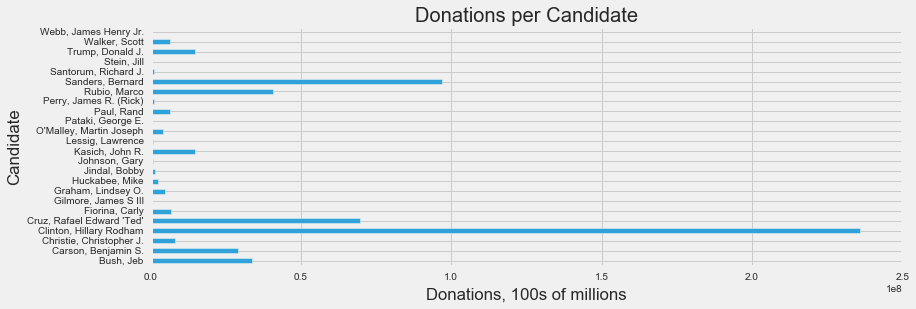

In [96]:
#Exploring total donations per candidate
cand_amount=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum().plot(kind='barh',style='fivethirtyeight',figsize=(12,4))
plt.ylabel('Candidate')
plt.xlabel('Donations, 100s of millions')
plt.title('Donations per Candidate')

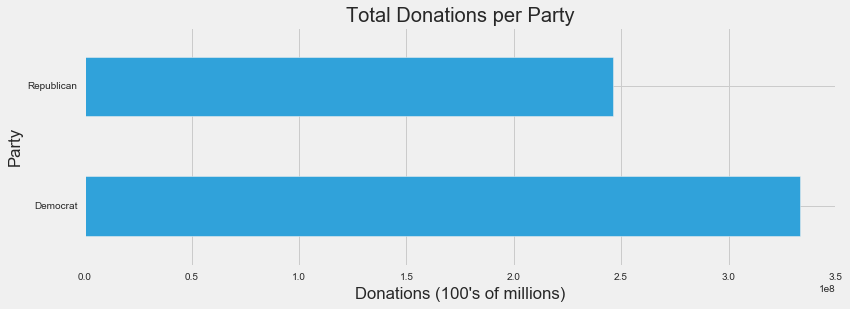

In [49]:
party_amount=donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='barh',figsize=(12,4),style='fivethirtyeight')
plt.xlabel("Donations (100's of millions)")
plt.title ('Total Donations per Party')

In [14]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc = 'sum')


In [33]:
occupation_df=occupation_df.sort(['Democrat','Republican'],ascending=False)

occupation_df.head()

/Users/t-carpen93/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Party,Democrat,Republican
contbr_occupation,,
RETIRED,3.086039e+07,5.332152e+07
NOT EMPLOYED,2.814506e+07,1.404392e+05
ATTORNEY,2.262969e+07,9.062951e+06
INFORMATION REQUESTED,9.460557e+06,3.025342e+06
HOMEMAKER,7.517015e+06,1.501983e+07


In [47]:
occupation_df.drop('CONDUIT TOTAL LISTED IN AGG. FIELD',inplace=True)

occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
RETIRED,3.086039e+07,5.332152e+07
NOT EMPLOYED,2.814506e+07,1.404392e+05
ATTORNEY,2.262969e+07,9.062951e+06
HOMEMAKER,7.517015e+06,1.501983e+07
PHYSICIAN,6.650749e+06,4.765485e+06


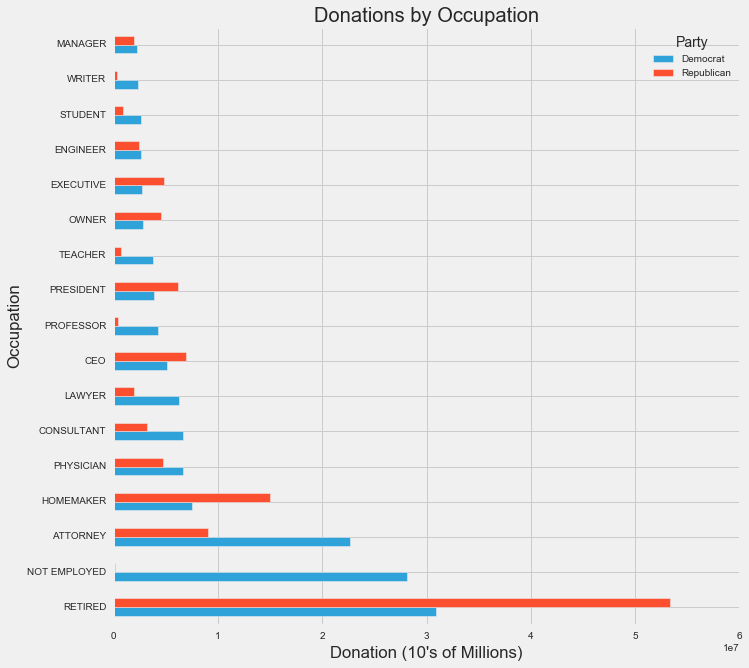

In [48]:
occupation_df[:17].plot(kind='barh',figsize=(10,10))
plt.ylabel('Occupation')
plt.xlabel("Donation (10's of Millions)")
plt.title('Donations by Occupation')